In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [16]:
df = pd.read_csv(r"C:\Users\yetes\OneDrive\Desktop\Excel\IRIS.csv")

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()

In [20]:
df['species'] = encoder.fit_transform(df['species'])

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


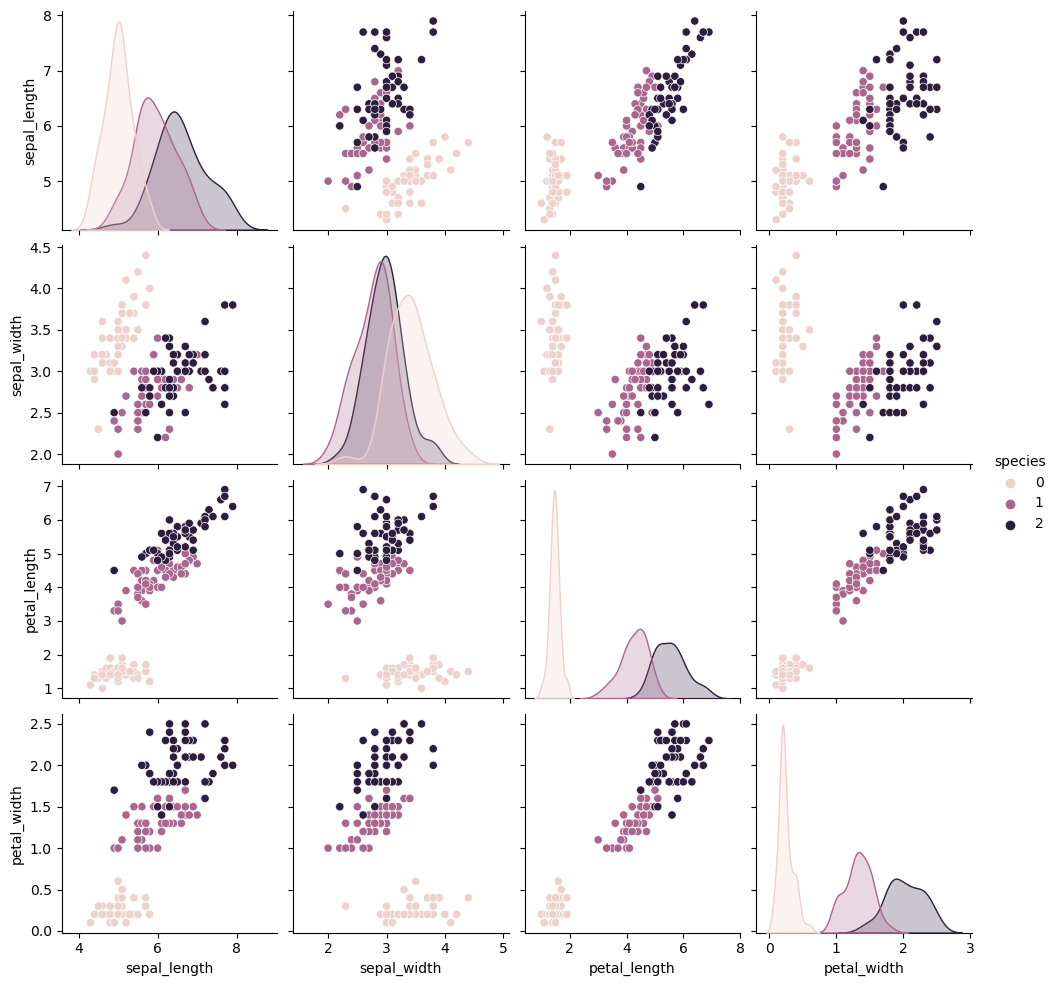

In [29]:
sns.pairplot(df,hue='species')

# below code for to engore the warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
new_df = df[df['species']!=0][['sepal_length','sepal_width','species']]

In [25]:
new_df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [26]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [31]:
Clf1 = LogisticRegression()
Clf2 = RandomForestClassifier()
Clf3 = KNeighborsClassifier()

In [32]:
estimators = [('lr',Clf1),('rf',Clf2),('Knn',Clf3)]

In [36]:
for estimator in estimators:
    x= cross_val_score(estimator[1],X,y,cv=10, scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.71
Knn 0.76


***Hard Voting***

In [39]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc, X,y,cv=10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


***Soft Voting***

In [40]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc, X,y,cv=10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


***Weighted Voting***

In [45]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc2 = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc2, X,y,cv=10, scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.77
for i=1,j=1,k=3 0.75
for i=1,j=2,k=1 0.77
for i=1,j=2,k=2 0.77
for i=1,j=2,k=3 0.75
for i=1,j=3,k=1 0.73
for i=1,j=3,k=2 0.75
for i=1,j=3,k=3 0.76
for i=2,j=1,k=1 0.78
for i=2,j=1,k=2 0.77
for i=2,j=1,k=3 0.77
for i=2,j=2,k=1 0.77
for i=2,j=2,k=2 0.77
for i=2,j=2,k=3 0.76
for i=2,j=3,k=1 0.75
for i=2,j=3,k=2 0.75
for i=2,j=3,k=3 0.77
for i=3,j=1,k=1 0.81
for i=3,j=1,k=2 0.79
for i=3,j=1,k=3 0.79
for i=3,j=2,k=1 0.78
for i=3,j=2,k=2 0.77
for i=3,j=2,k=3 0.76
for i=3,j=3,k=1 0.77
for i=3,j=3,k=2 0.76
for i=3,j=3,k=3 0.77
